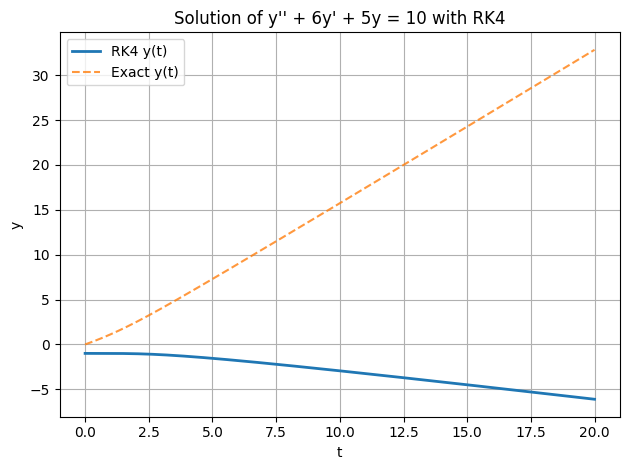

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import*

# ODE: y'' + 6y' + 5y = 10
# x1 = y
# x2 = y'
# x1' = x2
# x2' = 10 - 6*x2 - 5*x1 //system of ode?
m1 = 1
m2 = 1
G = 1;


def f(t, x):
    x1,y1,x2,y2,v1,u1,v2,u2 = x
    r = ((x1 - x2)**2 + ( y1 - y2 )**2)**(3/2)
    alpha=G/r
    dx1 = u1
    dy1 = v1
    dx2 = u2
    dy2 = v2
    du1 = -alpha*m2*(x1-x2)
    dv1 = -alpha*m2*(y1-y2)
    du2 = -alpha*m1*(x2-x1)
    dv2 = -alpha*m1*(y2-y1)
    return np.array([dx1,dy1,dx2,dy2,du1,dv1,du2,dv2])
    

def rk4_step(t, x, h, f):
    k1 = f(t, x)
    k2 = f(t + 0.5*h, x + 0.5*h*k1)
    k3 = f(t + 0.5*h, x + 0.5*h*k2)
    k4 = f(t + h, x + h*k3)
    return x + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

# Parameters
t0 = 0.0
t_end = 20.0
h = 0.0001  # step size

# Time grid
N = int((t_end - t0)/h)
t = np.linspace(t0, t_end, N+1)

# Initial conditions
x = np.zeros((N+1, 8))
x[0, 0] = -1.0  
x[0, 1] = 0.0  
x[0, 2] = 1.0
x[0, 3] = 0.0
x[0, 4] = 1.0
x[0, 5] = 0.0
x[0, 6] = 1.0
x[0, 7] = 0.0

# Integrate with RK4
for n in range(N):
    x[n+1] = rk4_step(t[n], x[n], h, f)

y = x[:, 0]
yp = x[:, 1]

# Plot
plt.plot(t, y, label='RK4 y(t)', linewidth=2)
plt.plot(t, yp, '--', label='Exact y(t)', alpha=0.8)
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solution of y'' + 6y' + 5y = 10 with RK4")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


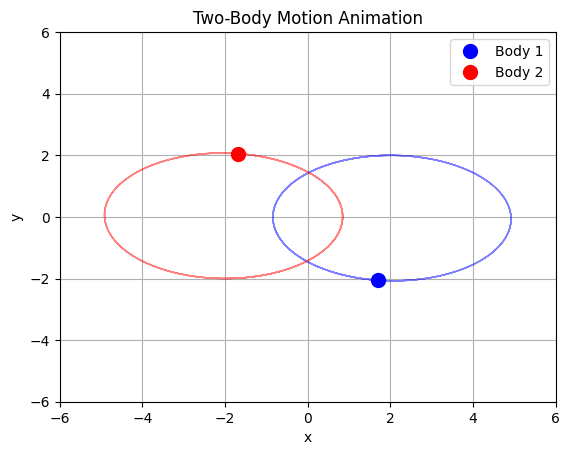

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
m1 = 1
m2 = 1
G = 1

def f(t, x):
    x1, y1, x2, y2, u1, v1, u2, v2 = x
    dx = x1 - x2
    dy = y1 - y2
    r_squared = dx**2 + dy**2
    r = r_squared ** 1.5  # Equivalent to ((dx)**2 + (dy)**2)**(3/2)
    alpha = G / r
    dx1 = u1
    dy1 = v1
    dx2 = u2
    dy2 = v2
    du1 = -alpha * m2 * dx
    dv1 = -alpha * m2 * dy
    du2 = -alpha * m1 * -dx  # Equivalent to -alpha * m1 * (x2 - x1)
    dv2 = -alpha * m1 * -dy  # Equivalent to -alpha * m1 * (y2 - y1)
    return np.array([dx1, dy1, dx2, dy2, du1, dv1, du2, dv2])

def rk4_step(t, x, h, f):
    k1 = f(t, x)
    k2 = f(t + 0.5 * h, x + 0.5 * h * k1)
    k3 = f(t + 0.5 * h, x + 0.5 * h * k2)
    k4 = f(t + h, x + h * k3)
    return x + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

# Parameters
t0 = 0.0
t_end = 200.0
h = 0.001  # step size

# Time grid
N = int((t_end - t0) / h)
t = np.linspace(t0, t_end, N + 1)

# Initial conditions
x = np.zeros((N + 1, 8))
x[0, 0] = 2.0  # x1
x[0, 1] = 2.0   # y1
x[0, 2] = -2.0   # x2
x[0, 3] = -2.0   # y2
x[0, 4] = -0.3
x[0, 5] = 0.0   # v1 (vy1)
x[0, 6] = 0.3   # u2 (vx2)
x[0, 7] = 0.0   # v2 (vy2)

# Integrate with RK4
for n in range(N):
    x[n + 1] = rk4_step(t[n], x[n], h, f)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-6, 6)  # Adjusted based on motion (system moves right)
ax.set_ylim(-6, 6)   # Motion mostly along x-axis, but allow some y deviation if any
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Two-Body Motion Animation')
ax.grid(True)

# Plot points for the bodies
point1, = ax.plot([], [], 'bo', markersize=10, label='Body 1')
point2, = ax.plot([], [], 'ro', markersize=10, label='Body 2')
ax.legend()

# Optional: Plot trails (trajectories)
trail1, = ax.plot([], [], 'b-', alpha=0.5, linewidth=1)
trail2, = ax.plot([], [], 'r-', alpha=0.5, linewidth=1)

# Initialization function
def init():
    point1.set_data([], [])
    point2.set_data([], [])
    trail1.set_data([], [])
    trail2.set_data([], [])
    return point1, point2, trail1, trail2

# Animation function
def animate(i):
    point1.set_data([x[i, 0]], [x[i, 1]])
    point2.set_data([x[i, 2]], [x[i, 3]])
    trail1.set_data(x[:i+1, 0], x[:i+1, 1])
    trail2.set_data(x[:i+1, 2], x[:i+1, 3])
    return point1, point2, trail1, trail2

# Create animation (downsample frames for smoother animation, every 1000 steps ~20 frames)
step = 1000
ani = animation.FuncAnimation(fig, animate, frames=range(0, N + 1, step),
                              init_func=init, blit=True, interval=50)

# To display in interactive environments like Jupyter, use ani.to_jshtml()
# Otherwise, save to file
ani.save('two_body_motion.gif', writer='pillow', fps=20)

# If you want to show it instead (e.g., in a script), uncomment:
# plt.show()